In [5]:
### READ, VIEW, STRUCTURE, SUMMARY:

auto_mpg <- read.csv(file.choose())
# uses R-console to choose file
# can also use read.csv("/Users/...path.../auto-mpg.csv")

In [6]:
str(auto_mpg)
summary(auto_mpg)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinder    : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : Factor w/ 94 levels "?","100","102",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car.name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


      mpg           cylinder      displacement     horsepower      weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   150    : 22   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   90     : 20   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   88     : 19   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   110    : 18   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   100    : 17   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   75     : 14   Max.   :5140  
                                                 (Other):288                 
  acceleration     model.year        origin                car.name  
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   ford pinto    :  6  
 1st Qu.:13.82   1st Qu.:73.00   1st Qu.:1.000   amc matador   :  5  
 Median :15.50   Median :76.00   Median :1.000   ford maverick :  5  
 Mean   :15.57   Mean   :76.01   Mean   :1.573   toyota corolla:  5  
 3rd Qu.:17.18   3rd Qu.:7

In [7]:
# data set has 9 variables (mpg is 1; other 8 variables will be analyzed to study its feature)
# mpg statistics: IQR = 29.00 - 17.50 = 11.5; data set 1.5*IQR boundaries

In [38]:
### CLEAN DATA:

# non-numeric variables changed to numbers
# horsepower contains ?

auto_mpg1 <- auto_mpg[-c(33,127,331,337,355,375),]
auto_mpg_clean <- auto_mpg1[,-c(9)]
auto_mpg_clean$horsepower <- as.numeric(auto_mpg_clean$horsepower)
model <- lm(mpg~., data = auto_mpg)
# summary(model)
# model shows unclean data
model1 <- lm(mpg~., data = auto_mpg_clean)
summary(model1)
str(auto_mpg_clean)


Call:
lm(formula = mpg ~ ., data = auto_mpg_clean)

Residuals:
   Min     1Q Median     3Q    Max 
-9.656 -2.069 -0.043  1.775 13.098 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.134e+01  4.292e+00  -4.971 1.00e-06 ***
cylinder     -2.739e-01  3.398e-01  -0.806   0.4208    
displacement  1.539e-02  7.275e-03   2.116   0.0350 *  
horsepower    1.072e-02  7.076e-03   1.515   0.1306    
weight       -6.756e-03  5.828e-04 -11.592  < 2e-16 ***
acceleration  1.489e-01  7.777e-02   1.914   0.0563 .  
model.year    7.688e-01  4.972e-02  15.463  < 2e-16 ***
origin        1.344e+00  2.701e-01   4.975 9.89e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.324 on 384 degrees of freedom
Multiple R-squared:  0.8218,	Adjusted R-squared:  0.8186 
F-statistic: 253.1 on 7 and 384 DF,  p-value: < 2.2e-16


'data.frame':	392 obs. of  8 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinder    : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...


In [9]:
### TRAIN DATASET & TEST DATASET:

# train 300 obs., test 301 to 392 obs.
# 393-398: ? values
train <- auto_mpg_clean[1:300,]
test <- auto_mpg_clean[301:392,]


Call:
lm(formula = train$mpg ~ train$cylinder, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1071  -2.3012  -0.4306   1.8282  16.9282 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     37.9130     0.7356   51.54   <2e-16 ***
train$cylinder  -2.9353     0.1211  -24.24   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.678 on 298 degrees of freedom
Multiple R-squared:  0.6636,	Adjusted R-squared:  0.6624 
F-statistic: 587.8 on 1 and 298 DF,  p-value: < 2.2e-16


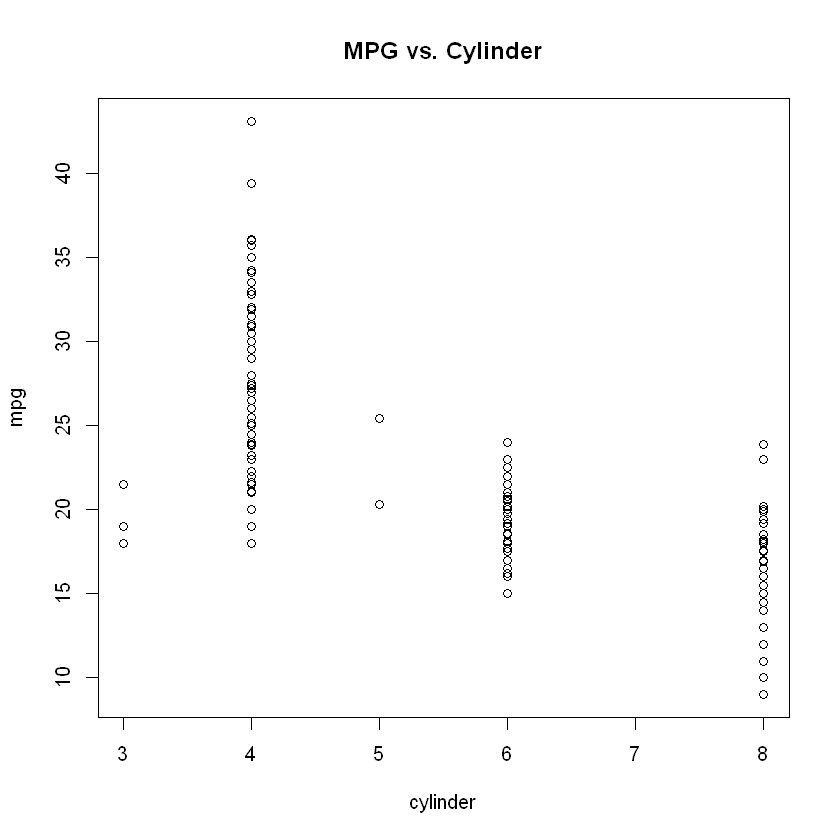

In [10]:
### MULTIPLE R-SQUARED:

# MPG vs. Cylinder
traincylinder <- lm(train$mpg ~ train$cylinder, data = train)
summary(traincylinder)
plot(train$cylinder, train$mpg, main = "MPG vs. Cylinder", xlab = "cylinder", ylab = "mpg")


Call:
lm(formula = train$displacement ~ train$mpg, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-186.167  -35.216   -2.498   33.558  198.391 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 517.6038    11.6978   44.25   <2e-16 ***
train$mpg   -14.5242     0.5372  -27.04   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 58.8 on 298 degrees of freedom
Multiple R-squared:  0.7104,	Adjusted R-squared:  0.7094 
F-statistic: 731.1 on 1 and 298 DF,  p-value: < 2.2e-16


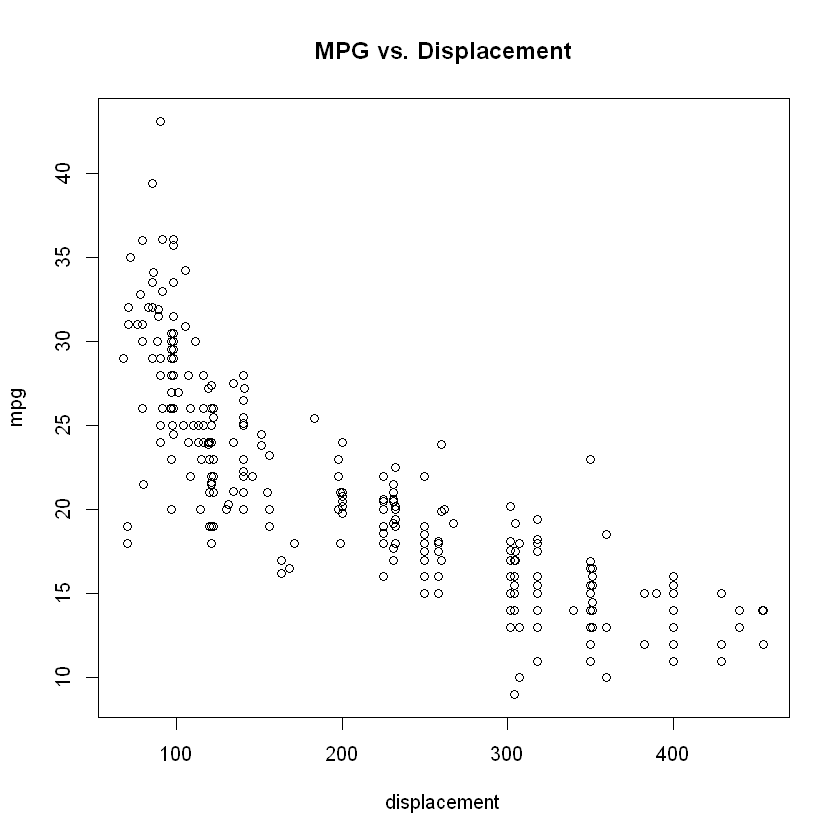

In [11]:
# MPG vs. Displacement 
traindisplacement <- lm(train$displacement ~ train$mpg, data = train)
summary(traindisplacement)
plot(train$displacement, train$mpg, main = "MPG vs. Displacement", xlab = "displacement", ylab = "mpg")


Call:
lm(formula = train$horsepower ~ train$mpg, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.697 -18.444  -0.606  20.316  50.798 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5888     5.2436   0.112    0.911    
train$mpg     2.3119     0.2408   9.601   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 26.36 on 298 degrees of freedom
Multiple R-squared:  0.2363,	Adjusted R-squared:  0.2337 
F-statistic: 92.18 on 1 and 298 DF,  p-value: < 2.2e-16


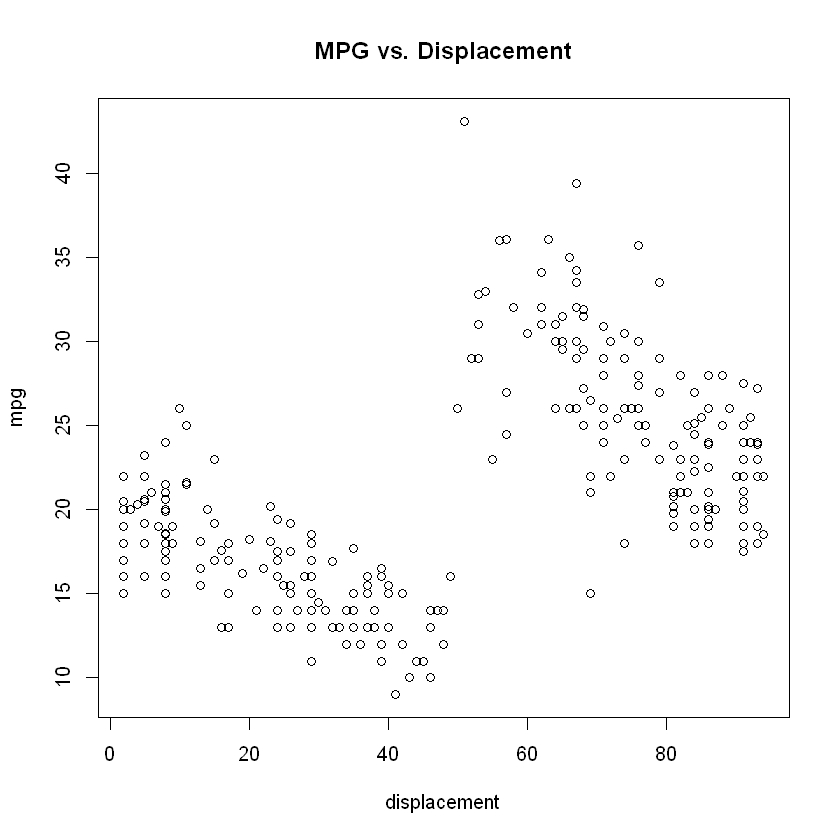

In [12]:
# MPG vs. Horsepower
trainhorsepower <- lm(train$horsepower ~ train$mpg, data = train)
summary(trainhorsepower)
plot(train$horsepower, train$mpg, main = "MPG vs. Displacement", xlab = "displacement", ylab = "mpg")


Call:
lm(formula = train$weight ~ train$mpg, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1359.51  -273.50    -0.02   264.01  1579.43 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5690.791     84.216   67.57   <2e-16 ***
train$mpg   -122.627      3.867  -31.71   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 423.3 on 298 degrees of freedom
Multiple R-squared:  0.7714,	Adjusted R-squared:  0.7706 
F-statistic:  1005 on 1 and 298 DF,  p-value: < 2.2e-16


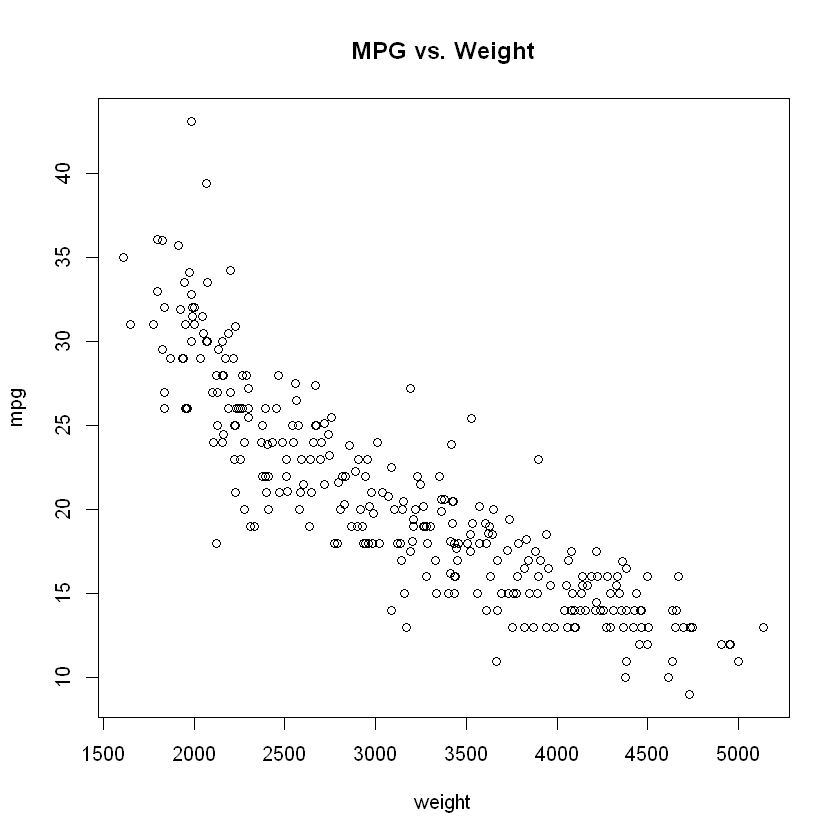

In [13]:
# MPG vs. Weight
trainweight <- lm(train$weight ~ train$mpg, data = train)
summary(trainweight)
plot(train$weight, train$mpg, main = "MPG vs. Weight", xlab = "weight", ylab = "mpg")


Call:
lm(formula = train$acceleration ~ train$mpg, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9084 -1.7107 -0.2921  1.4030  8.2824 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.14106    0.49082   22.70   <2e-16 ***
train$mpg    0.19767    0.02254    8.77   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.467 on 298 degrees of freedom
Multiple R-squared:  0.2052,	Adjusted R-squared:  0.2025 
F-statistic: 76.91 on 1 and 298 DF,  p-value: < 2.2e-16


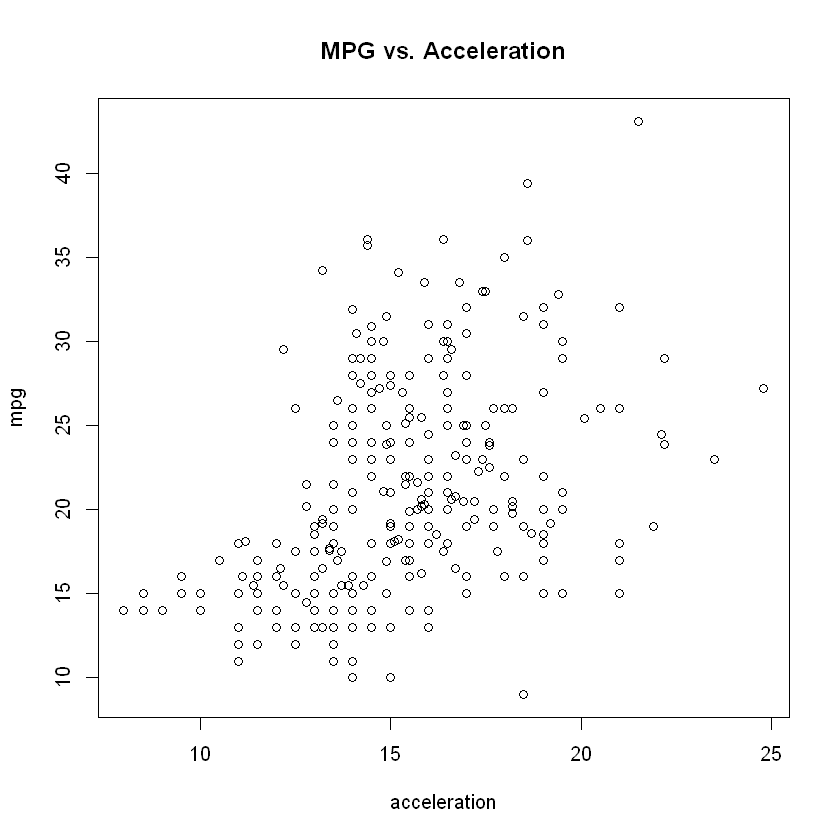

In [14]:
# MPG vs. Acceleration
trainacceleration <- lm(train$acceleration ~ train$mpg, data = train)
summary(trainacceleration)
plot(train$acceleration, train$mpg, main = "MPG vs. Acceleration", xlab = "acceleration", ylab = "mpg")


Call:
lm(formula = train$model.year ~ train$mpg, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3228 -1.9428  0.1113  2.1002  5.2194 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 71.75982    0.53199 134.890  < 2e-16 ***
train$mpg    0.13037    0.02443   5.337 1.88e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.674 on 298 degrees of freedom
Multiple R-squared:  0.08723,	Adjusted R-squared:  0.08417 
F-statistic: 28.48 on 1 and 298 DF,  p-value: 1.878e-07


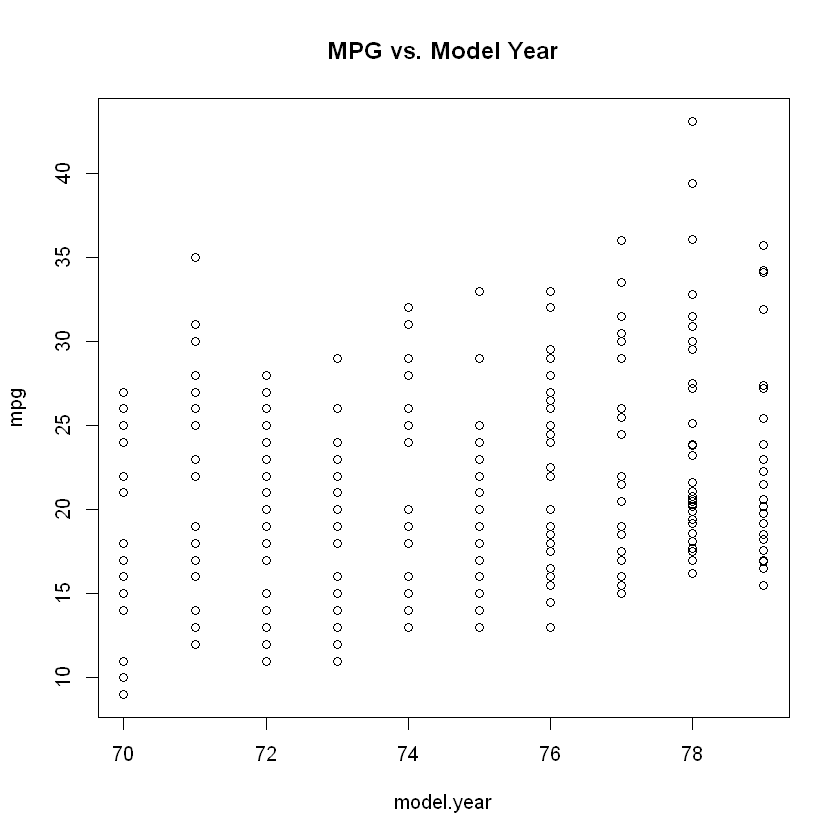

In [15]:
# MPG vs. Model Car
trainmodel.year <- lm(train$model.year ~ train$mpg, data = train)
summary(trainmodel.year)
plot(train$model.year, train$mpg, main = "MPG vs. Model Year", xlab = "model.year", ylab = "mpg")


Call:
lm(formula = train$origin ~ train$mpg, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52042 -0.34713 -0.07268  0.20178  1.72148 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.043476   0.118852   0.366    0.715    
train$mpg   0.068613   0.005458  12.572   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5975 on 298 degrees of freedom
Multiple R-squared:  0.3466,	Adjusted R-squared:  0.3444 
F-statistic:   158 on 1 and 298 DF,  p-value: < 2.2e-16


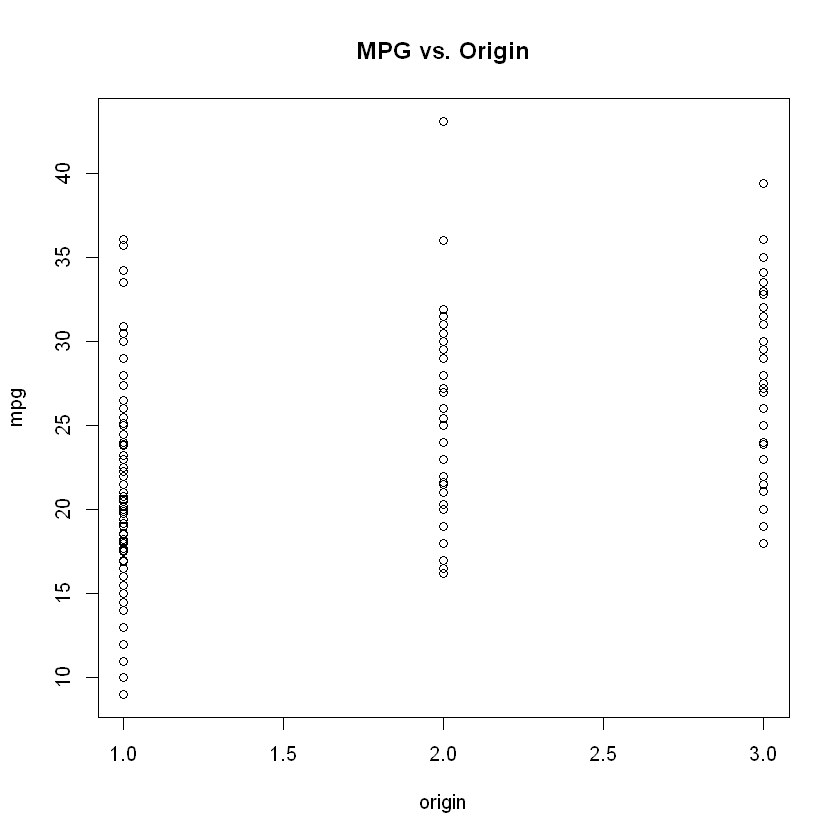

In [16]:
# MPG vs. Origin
trainorigin <- lm(train$origin ~ train$mpg, data = train)
summary(trainorigin)
plot(train$origin, train$mpg, main = "MPG vs. Origin", xlab = "origin", ylab = "mpg")

In [17]:
### ADJUSTED R-SQUARED:

attach(train)
adjustedmodel <- lm(mpg ~ cylinder + displacement + weight, data = train)
summary(adjustedmodel)


Call:
lm(formula = mpg ~ cylinder + displacement + weight, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-9.559 -1.892 -0.151  1.712 15.113 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.0682163  1.1448111  34.126   <2e-16 ***
cylinder     -0.0579278  0.3260901  -0.178   0.8591    
displacement -0.0103839  0.0062078  -1.673   0.0954 .  
weight       -0.0049947  0.0005411  -9.231   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.009 on 296 degrees of freedom
Multiple R-squared:  0.7764,	Adjusted R-squared:  0.7741 
F-statistic: 342.6 on 3 and 296 DF,  p-value: < 2.2e-16


In [18]:
# cylinder had no significance
attach(train)
adjustedmodel2 <- lm(mpg ~ displacement + weight, data = train)
summary(adjustedmodel2)

The following objects are masked from train (pos = 3):

    acceleration, cylinder, displacement, horsepower, model.year, mpg,
    origin, weight




Call:
lm(formula = mpg ~ displacement + weight, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5232 -1.8741 -0.1765  1.6766 15.1041 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.9422109  0.8971239  43.408   <2e-16 ***
displacement -0.0111720  0.0043353  -2.577   0.0104 *  
weight       -0.0050080  0.0005351  -9.360   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.004 on 297 degrees of freedom
Multiple R-squared:  0.7764,	Adjusted R-squared:  0.7749 
F-statistic: 515.6 on 2 and 297 DF,  p-value: < 2.2e-16


In [ ]:
# message because both the packages have functions with same name
# can either ‘detach()’ or not ‘attach()’ again

In [19]:
### COMPLETE LINEAR REGRESSION EQUATION:

attach(train)
adjustedmodel2 <- lm(mpg ~ displacement + weight, data = train)
# attached for better example

The following objects are masked from train (pos = 3):

    acceleration, cylinder, displacement, horsepower, model.year, mpg,
    origin, weight

The following objects are masked from train (pos = 4):

    acceleration, cylinder, displacement, horsepower, model.year, mpg,
    origin, weight



In [20]:
### PREDICT & COMPARE:

# predict and compare using best linear model
pred <- coef(trainweight)[1] + coef(trainweight)[2]*test$mpg
test_mpg <- test[,1]
error <-  pred - test_mpg
summary(error)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -70.22 1240.22 1728.55 1741.45 2263.24 3514.96 

In [23]:
# error range too high using only weight
# predict with displacement and weight
pred1 <- coef(adjustedmodel2)[1] + coef(adjustedmodel2)[2]*test$displacement + coef(adjustedmodel2)[3]*test$weight
test_mpg1 <- test[,1]
error1 <- test_mpg1 - pred1
summary(error1)
error1 <- error1 - 6.764
summary(error1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -2.341   3.519   6.431   6.764   9.304  19.185 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-9.10483 -3.24530 -0.33306 -0.00035  2.54028 12.42144 

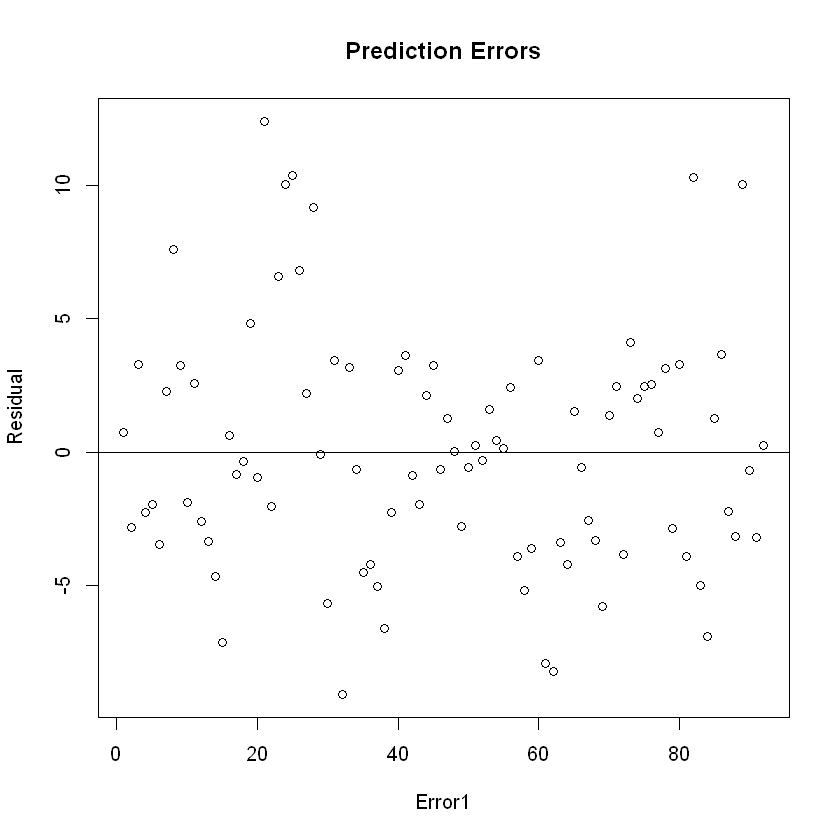

In [24]:
### RESIDUAL PLOT: 

plot(error1, main = 'Prediction Errors', xlab = 'Error1', ylab = 'Residual')
abline(0,0)

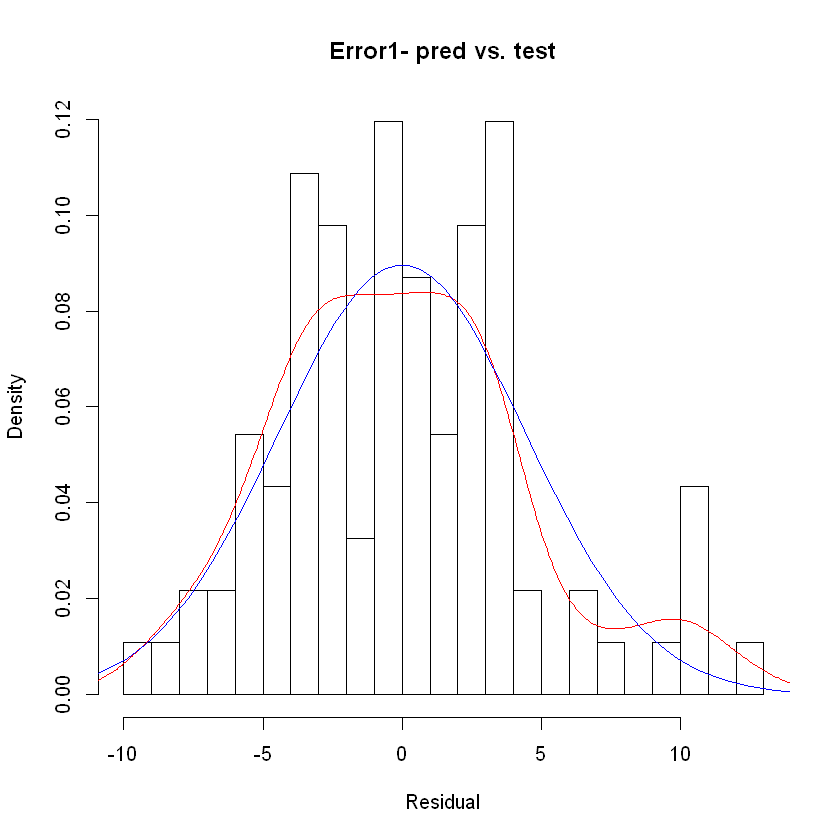

In [25]:
### HISTOGRAM:

hist(error1, prob = T, breaks = 20, main = 'Error1- pred vs. test', xlab = 'Residual', ylab = 'Density')
lines(density(error1), col='red')
mean_e <- mean(error1)
var_e <- var(error1)
sd_e <- sqrt(var_e)
x_e <- seq(-20,20, length=92)
y_e <- dnorm(x_e, mean_e, sd_e)
lines(x_e, y_e, col = 'blue')

In [ ]:
### BONUS:

# trouble working on IRkernel
source("https://install-github.me/dreamRs/esquisse")
esquisse::esquisser()
ggplot(data = test) +
  aes() +
  geom_blank() +
  geom_smooth(span = 1) +
  labs(title = "MPG vs Weight, Displacement",
    x = "weight",
    y = "mpg",
    caption = "ggplot2 builder",
    subtitle = "Adjusted R-squared: 0.77") +
  theme_classic()

# allows to choose dataframe, variables, graph type
# the plot is in plots folder

In [ ]:
### CONCLUSION:

# highest R-squared was ~0.78 with displacement and weight variables for mpg